# Natural Language Processing (NLP)
In this notebook we will introduce the basic concepts of NLP. NLP is the traditional term for intelligent text processing where a computer program tries to interpret what is written in natural language text or speech using computational linguistic methods. “ [1]

In this tutorial we will do some basic NLP.
- Part 1: Basic NLP Tasks
    1. Segmentation and tekenizatiom
    2. Stemming and lemmatization
    3. Stopword
    4. Word representation
        - Bag-of-words
        - TF.IDF
<br> <br>  
- Part 2: Creating an NLP Pipeline for Classification
    1. Importing the data
    2. Cleaning and preprocessing 
    3. Word representation
    4. Applying the classification models
    5. Using a classification model

## Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

**Pandas** is a python package that deals mostly with :
- **Series**  (1d homogeneous array)
- **DataFrame** (2d labeled heterogeneous array) 

**matplotlib.pyplot** is a collection of functions that where each function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

**NLTK**: The Natural Language Toolkit, a platform used for building Python programs that work with human language data. 
- Contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning. 
- Includes graphical demonstrations and sample data sets 
- Includes a cook book and a book which explains the principles behind the underlying language processing tasks that NLTK supports.

### Let's do some basic text processing

In [2]:
s = "My String"
s

'My String'

In [3]:
print(len(s))

9


In [4]:
print(s.index("y"))

1


In [5]:
print(s.lower())

my string


In [6]:
afewwords = s.split(" ")
afewwords

['My', 'String']

In [7]:
# Check how a string starts
if s.startswith("My"):
    print("String starts with 'My'. Good!")
else:
    print("Naah!")

# Check how a string ends
if s.endswith("ing"):
    print("String ends with 'ing'. Good!")
else:
    print("Naah!")

String starts with 'My'. Good!
String ends with 'ing'. Good!


## Part 1: Basic NLP Tasks

### 1. Segmentation and Tokenisation

- Separating sentences/ words from each other. 
- Must think about issues such as delimiters.. 
- Human written text such as tweets or clinical text is noisy, contains abbreviations, tokenizing can be difficult.   

Chunking whitespace seems very easy, but it's not, because the text contains punctuation and contractions. Let's start with an example:

In [8]:
my_text = "The coolest job in the next 10 years will be " +\
              "statisticians. People think I'm joking, but " +\
              "who would've guessed that computer engineers " +\
              "would've been the coolest job of the 1990s?"
simple_tokens = my_text.split(' ')
print (simple_tokens)

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians.', 'People', 'think', "I'm", 'joking,', 'but', 'who', "would've", 'guessed', 'that', 'computer', 'engineers', "would've", 'been', 'the', 'coolest', 'job', 'of', 'the', '1990s?']


No perfect! Some words didn't split like would've. let's try NLTK... 

In [9]:
nltk_tokens = nltk.word_tokenize(my_text)
print (nltk_tokens)

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians', '.', 'People', 'think', 'I', "'m", 'joking', ',', 'but', 'who', 'would', "'ve", 'guessed', 'that', 'computer', 'engineers', 'would', "'ve", 'been', 'the', 'coolest', 'job', 'of', 'the', '1990s', '?']


### 2. Stemming and Lemmatization

- Both aims at finding the root of the word.
- Stemming: may not be a word and may not have an entry in the dictionary. 
- Example: beautiful --> beauti
- Lemmatization: the root must have an entry in the dictionary.
  
**Python Implementation** 
There are a number of different stemmers in Python, these are:
- Porter stemmer
- Lancaster stemmer
- Regex based stemmer
- Snowball stemmer

In [10]:
from nltk.stem import *
stemmer = LancasterStemmer()
print ([stemmer.stem(word) for word in nltk_tokens])

['the', 'coolest', 'job', 'in', 'the', 'next', '10', 'year', 'wil', 'be', 'stat', '.', 'peopl', 'think', 'i', "'m", 'jok', ',', 'but', 'who', 'would', "'ve", 'guess', 'that', 'comput', 'engin', 'would', "'ve", 'been', 'the', 'coolest', 'job', 'of', 'the', '1990s', '?']


Notice how statistician --> root, stat

### 3. Stopwords
- Stopwords are the least informative (tokens) in text.
- Most common words (such as the, it, is, as, and not). 
- Stopwords are often removed. 
- When removed, the processing takes less time and less memory; and sometimes more accurate. 
- They are high in frequency, approximately 40% of the words in a text. 
- There are around 200 typical stop words in each language.

In [11]:
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words("english")

### 4. Word representation

- Bag of words
- TF IDF
- Other advanced methods, word embedding.

### Bag of words

In [12]:
# simple count vectorizer example
from sklearn.feature_extraction.text import CountVectorizer

# start with a simple example
train_simple = ['call you tonight','Call me a cab','please call me... PLEASE 44!']

# learn the 'vocabulary' of the training data
vect = CountVectorizer()

train_simple_dtm = vect.fit_transform(train_simple)

pd.DataFrame(train_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


In [13]:
# transform testing data into a document-term matrix (using existing vocabulary, notice don't is missing)

test_simple = ["please don't call me"]
test_simple_dtm = vect.transform(test_simple)
test_simple_dtm.toarray()
pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,1,1,0,0


### TF IDF: Term Frequency / Inverse Document Frequency

- Each word has a TF and IDF score
- Term frequency: **how many times the term appears in a document.** 
- Inverse Document Frequency: **reflects how important a word is to a document in a collection.** 

**Example** <br>
**TF:** a document containing 100 words and the word math apears 5 times, then TF for the word math is 5/100 = 0.05. <br>
**IDF:** if the word math appears in 10 documents and we have total of 50 document then IDF = log(50/10) = 1.6
   
- TF.IDF for the word math in this context is: 0.05 X 1.6 = 0.08
- The higher the TF.IDF the rarer the term and vice versa.

## Part 2: Creating an NLP Pipeline for Classification

### 1. Importing a sample dataset

In [14]:
df = pd.read_table('https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/sms.tsv', sep='\t', header=None, names=['label', 'msg'])
df

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


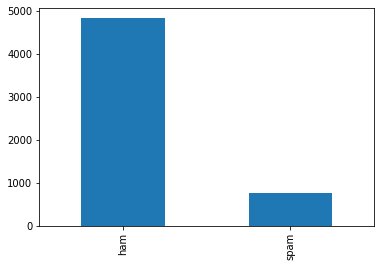

In [15]:
df.label.value_counts().plot(kind="bar")

In [16]:
df.shape

(5572, 2)

In [17]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

To get the probability that an email is a spam or ham: divide the number of ham/total eamils: (df.shape[0])

In [18]:
df.label.value_counts()/df.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

### 2. Cleaning and preprocessing
As we saw above tokenization, stemming, and stopword removal can all be part of the cleaning and preprocessing stage. in addition to the below:
- Removing HTML tags 
- Removing special characters
- Expanding contractions, he's --> he is
- Case conversion 
- Spelling correction <br> <br>
And more/less depending on the task..

In [19]:
# We will create a function that gourp some cleaning taks in one command.

def clean_and_stem_text(text):
    tokens = nltk.word_tokenize(text.lower())
    clean_tokens = [word for word in tokens if word not in stop_words]
    stem_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ".join(stem_tokens)

In [20]:
# testing the function with sample text

my_text = "The coolest job in the next 10 years will be " +\
              "statisticians. People think I'm joking, but " +\
              "who would've guessed that computer engineers " +\
              "would've been the coolest job of the 1990s?"

print(clean_and_stem_text(my_text))

coolest job next 10 year stat . peopl think 'm jok , would 've guess comput engin would 've coolest job 1990s ?


In [21]:
df['msg'] = df['msg'].apply(clean_and_stem_text)

In [22]:
df.head()

,label,msg
0,ham,"go jurong point , crazy.. avail bug n gre worl..."
1,ham,ok lar ... jok wif u on ...
2,spam,fre entry 2 wkly comp win fa cup fin tkts 21st...
3,ham,u dun say ear hor ... u c already say ...
4,ham,"nah n't think goe usf , liv around though"


### 3. Word representation

We will use TF IDF instead of bag of words. 

But first thing first...
We have to split our data to training and testing, X denote features (the words) and Y denote target (label = spam / ham)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['label'], test_size = 0.3, random_state = 1)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

### 4. Applying the classification models

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
from sklearn.metrics import confusion_matrix
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1442    0]
 [  30  200]]


True negative : actually ham predicted ham   = 489 <br>
True positive : actually spam predicted spam = 64 <br>
False negative: actually ham predicted spam  = 5 <br>
False positive: actually spam predicted ham  = 0

In [27]:
pred = svm.predict(X_test)
accuracy_score(y_test , pred)

0.9820574162679426

Voila!! Very high accuracy, now you have a calssification model that you can use..
We will try another classifier and compare, then we can select the best performing model and use it to classify new emails messages..

In [28]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1441    1]
 [  25  205]]


In [29]:
pred = mnb.predict(X_test)
accuracy_score(y_test, pred)

0.9844497607655502

Which it the best one? seems like NB is better..

### 5. Using the classification model

In [30]:
# we used NB, (mnb)

def pred(msg):    
    msg = vectorizer.transform([msg])    
    prediction = mnb.predict(msg)    
    return prediction[0]

In [31]:
pred("hello dear you invited to my party")

'ham'

In [32]:
pred("WINNER$$$$ SMS Reply 'WIN'")

'spam'

## References
[1] Clinical Text Mining Secondary Use of Patient Health Records, Hercules Dalianis,  
Springer Open, eBook https://doi.org/10.1007/978- 3- 319- 78503- 5
